## 이 파일에는 발표할 내용을 적어주세요
- 전처리 내용은 markdown으로 간단히 적고, 질문이 들어올 경우 01_EDA 파일을 보여주는 방식!
- read_csv부터 시작
- 연구배경, 선행연구, 문제정의, 분석방법, 분석결과, 결론 및 앞으로 보완할 점도 들어가는 발표 자료파일 입니다!
- 여기에는 발표할때 보여줄 수있는 가장 깔끔한 형태의 코드만 올려주세요 ㅠㅠ 코딩하는 과정에서 확인하기 위해 하는 과정이나, 발표하기에 부적합한 내용은 다른 파일 또는 폴더를 만들어서 해주세요!
- 다른사람이 작성한 내용은 되도록 수정하거나 삭제하지 말아주세요! 충돌이 일어나요

## 1. 연구배경
- 우리나라 소상공인은 2016년 기준 전체 사업체 수의 85.3%를 차지하며 국가 경제에서 높은 비중을 차지하고 있다.
- 이에따라 정부와 지자체는 소상공인이 안정적으로 창업활동을 지속할 수 있도록 다양한 지원정책을 펼치고 있으나 개별 소상공인을 대상으로 단순한 지원을 할 뿐 상권 자체에 관한 정책은 논의되지 못하였다(양갑모, 2006)
- 상권정보시스템은 상권의 현황정보 제공에만 중점을 두고있어 상권을 파악하는데 어려움이 있다.
- 소상공인 컨설팅 서비스는 유료로 서비스를 이용해야하고, 영향력의 정도를 정확히 알려주지 않는다는 한계가 있다.
- 따라서 소상공인의 창업 및 경영을 지원하고, 지자체 단체들에게 상권별로 적합한 소상공인 지원정책을 수립하는데 도움이 되고자 연구

## 2.선행연구

## 3. 문제 정의
- 상권의 특성과 업종을 반영하여 연매출 예측하기<br>

`용어, 명칭 정의하는 도형?표? 추가하기`

## 4. 전처리
`데이터 출처, 데이터 정의 테이블 추가하기`
- 2015년~ 2019년 데이터 수집
- null 값 대체
- 매출액과 상관관계가 0.2 이상인 컬럼 선정
- Merge
- 분기별 데이터를 연 데이터로 groupby 실행(인구, 점포수 등 일부 데이터는 1년에 1~2회 수집하기 때문에 연 매출 분석)



## 5. 회귀분석
- 상관관계 분석
    - 매출액과의 상관관계, 다중공선성을 발생할 수 있는 변수 탐색
- 부분 회귀분석
    - 매출액과의 부분회귀분석. 각 변수별 분석 확인. log 여부 판단
- OLS 분석
    - R-square 값 분석, MAE 또는 MAPE로 모델의 적절성 확인
- K-fold를 통해 과최적화 여부 분석
    - 과최적화인 경우 Rasso 등으로 해결 시도

### 5-1 상관관계 분석

In [5]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [6]:
df = pd.read_csv('raw_data/df_grouped_rate.csv',encoding='utf-8' )

C:\Users\PARKDONGJAE\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\PARKDONGJAE\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


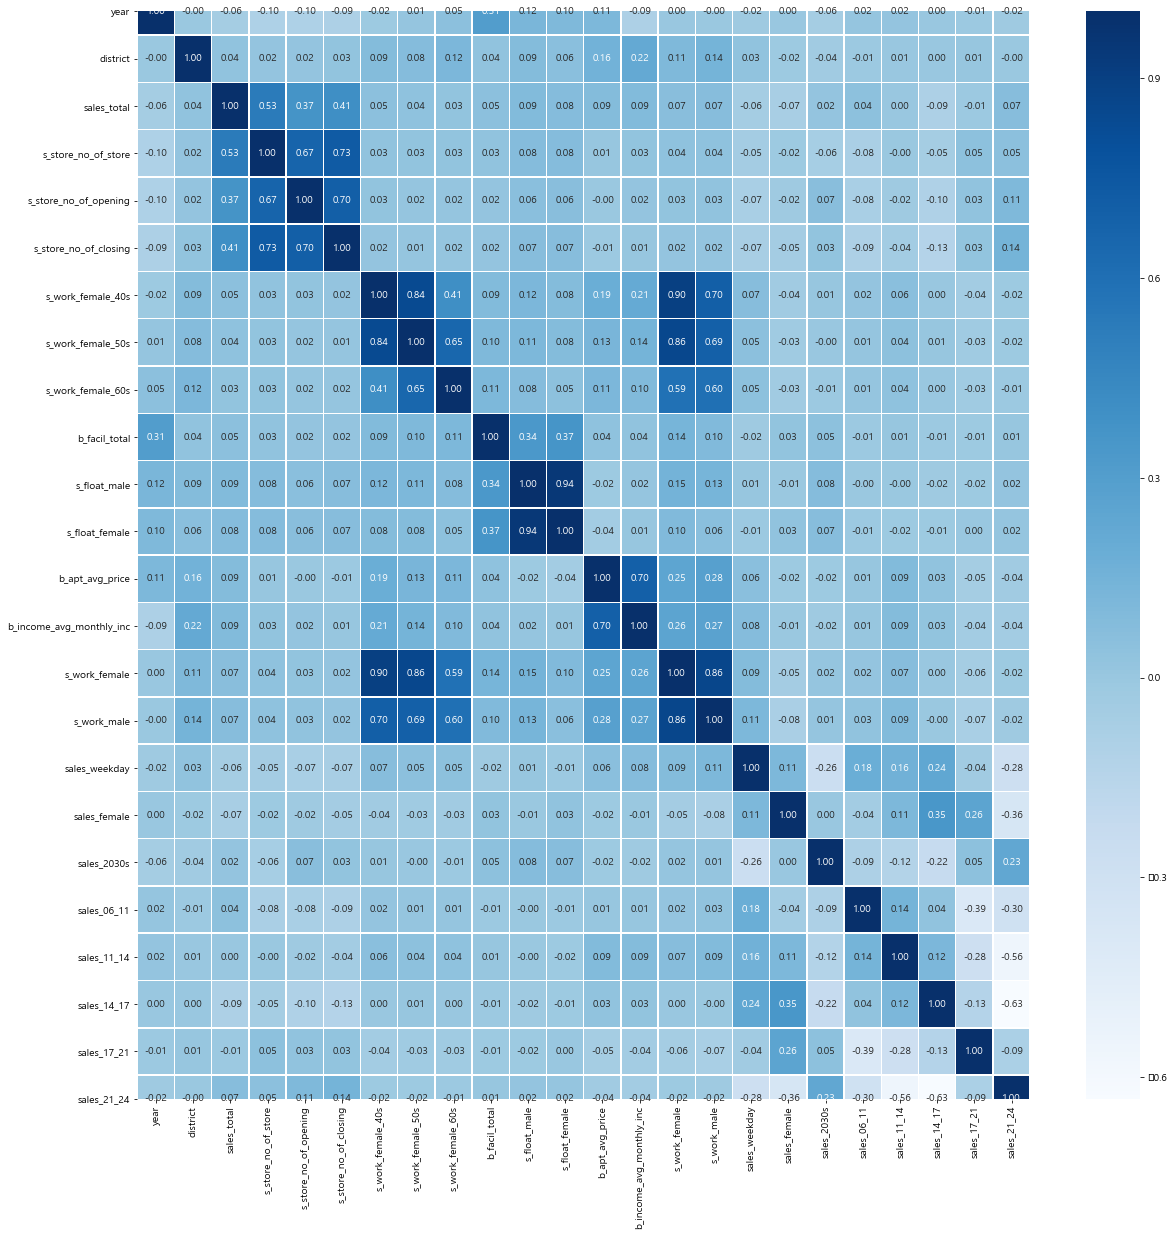

In [7]:
#상관관계 분석
# conda install -c conda-forge matplotlib=3.1.2 또는 3.1.1 깔면 heatmap이 잘리는거 해결할 수 있다고함(시간날때 수정할 예정)
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)


plt.figure(figsize=(20,20))
sns.heatmap(data = df.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

In [28]:
#로버스트 스케일링
from sklearn.preprocessing import RobustScaler
scale_columns = [i for i in df.columns if i not in ['year', 'district', 'code',]]

rb = RobustScaler()
rb.fit(df[scale_columns])
df_robust_scaled = rb.transform(df[scale_columns])
df_robust_scaled = pd.DataFrame(df_robust_scaled, columns=scale_columns)
df_robust_scaled2= pd.concat([df[['district','code']],df_robust_scaled], axis=1)
model= sm.OLS.from_formula("sales_total ~ C(district) +C(code) +"+" + ".join(scale_columns[1:]), data=df_robust_scaled2)
result =  model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            sales_total   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     88.73
Date:                Thu, 26 Dec 2019   Prob (F-statistic):               0.00
Time:                        16:58:26   Log-Likelihood:            -2.2375e+05
No. Observations:              113265   AIC:                         4.496e+05
Df Residuals:                  112193   BIC:                         4.600e+05
Df Model:                        1071                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

- 소결론
    - R-Square가 0.313로 다소 낮게 나왔다
    - 상권별로 영향이 다르나, 1000여개에 달하는 district 코드로는 분류하기 어려움
    - 시군구로 분류하여 회귀분석할 예정ㄴ

In [12]:
# #부분회귀분석 CCPR플롯으로 표현
# import matplotlib.pyplot as plt
# import statsmodels.api as sm
# fig = plt.figure(figsize=(15,30))
# sm.graphics.plot_ccpr_grid(result, fig=fig)
# plt.show()